In [3]:
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
plt.rc('font', family='NanumGothic')

['C:\\Windows\\Fonts\\comicbd.ttf', 'C:\\Windows\\Fonts\\HYDNKM.TTF', 'C:\\WINDOWS\\Fonts\\SHOWG.TTF', 'C:\\Windows\\Fonts\\SCHLBKBI.TTF', 'C:\\Windows\\Fonts\\VLADIMIR.TTF', 'C:\\WINDOWS\\Fonts\\GOUDOS.TTF', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf', 'C:\\WINDOWS\\Fonts\\ROCKBI.TTF', 'C:\\Windows\\Fonts\\FRSCRIPT.TTF', 'C:\\WINDOWS\\Fonts\\GOTHIC.TTF', 'C:\\Windows\\Fonts\\YDUG05.TTF', 'C:\\WINDOWS\\Fonts\\cambria.ttc', 'C:\\WINDOWS\\Fonts\\HANSolB.ttf', 'C:\\WINDOWS\\Fonts\\ERASMD.TTF', 'C:\\Windows\\Fonts\\FRADMIT.TTF', 'C:\\Windows\\Fonts\\timesbd.ttf', 'C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\WINDOWS\\Fonts\\BOD_BLAR.TTF', 'C:\\Windows\\Fonts\\H2GTRM.TTF', 'C:\\Windows\\Fonts\\verdanab.ttf', 'C:\\Windows\\Fonts\\LTYPEO.TTF', 'C:\\WINDOWS\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\TAENMR.TTF', 'C:\\WINDOWS\\Fonts\\segoescb.ttf', 'C:\\WINDOWS\\Fonts\\Candaral.ttf', 'C:\\WINDOWS\\Fonts\\msyi.ttf', 'C:\\Windows\\Fonts\\HARLOWSI.TTF', 'C:\\WINDOWS\\Fonts\\segoeprb.ttf', 'C:\\Windows\\F

C:\Users\KOREAIT\AppData\Local\Temp\ipykernel_1196\2108526668.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\KOREAIT\AppData\Local\Temp\ipykernel_1196\2108526668.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


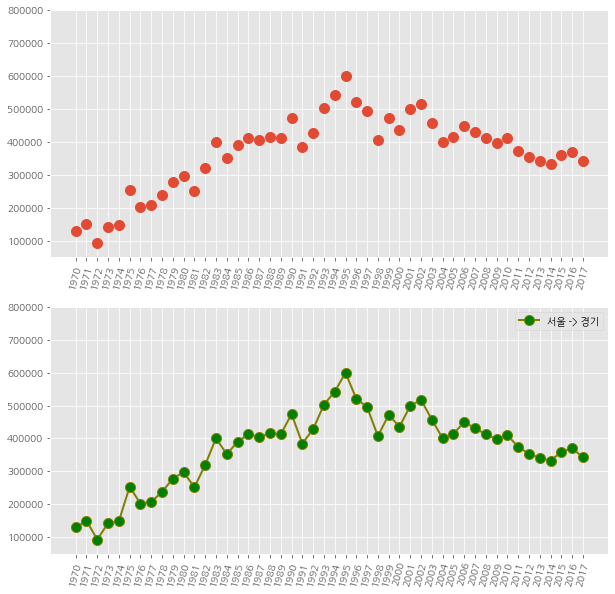

In [4]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))   
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, 
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력